### ÚLOHA 1 – Bayesovské odhady – 4. body
a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení [2 body]
Předpokládáme, že počet připojení na internetovou síť za 1 ms je popsaný náhodnou veličinou
s Poissonovým rozdělením s parametrem 𝜆, t.j. 𝑋~𝑃𝑜(𝜆).
O parametru 𝜆 máme následující expertní odhad: každých 5 ms by mělo nastat 10 připojení.
Pozorovali jsme připojení po dobu 100 ms. Pozorovaní o počtu připojení za každou 1 ms jsou
uvedené v souboru measurements.csv ve sĺoupci „úloha_1 a)“.
Vašim zadáním je z této expertní informace urči konjugované apriorní rozdělení k parametru
Poissonova rozdělení a na základě pozorovaní určit aposteriorní rozdělení. Dále určete
apriorní a aposteriorní prediktivní rozdělení pozorovaní.
Požadovaný výstup:
1) Do jednoho obrázku vykreslíte apriorní a aposteriorní hustotou parametru Poissonova
rozdělení 𝜆.
2) Do jednoho obrázku vykreslíte apriorní a aposteriorní prediktivní hustotou pozorovaní
𝑥 za jeden časový interval.
3) Sestrojte 95% interval spolehlivosti pro parametr 𝜆 z apriorního a aposteriorního
rozdělení a porovnejte je.
4) Vyberte si dva aposteriorní bodové odhady parametru 𝜆, porovnejte je a okomentujte
jejich výběr.
5) Vyberte si jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní a
porovnejte je. 

1. Podúkol:


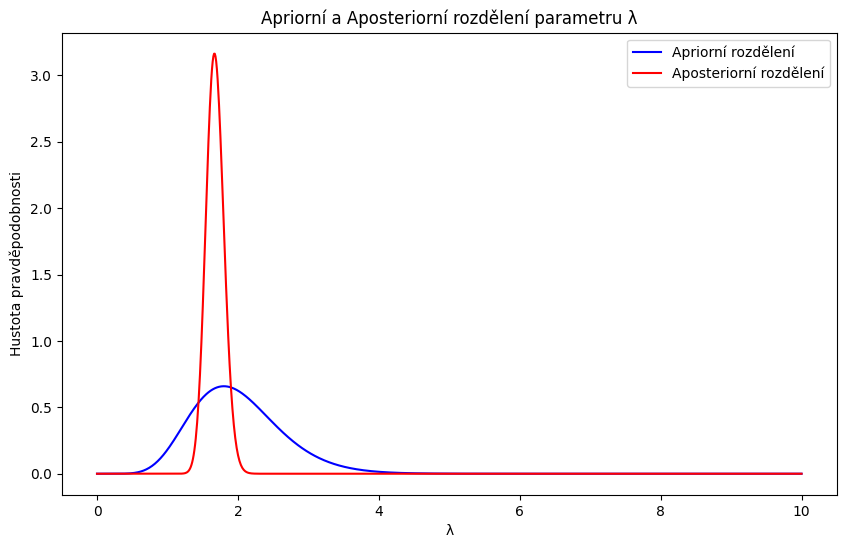

In [1456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, truncnorm, gamma, poisson, nbinom, pearsonr

data = pd.read_excel(r"Projekt-2_Data.xlsx", engine='openpyxl')

df = pd.DataFrame(data, columns=["uloha_1 a)"])[:100]

# Apriorní rozdělení
alpha = 10
beta = 5

# Aposteriorní rozdělení
alpha_post = alpha + df.sum()
beta_post = beta + len(df)

# 1. Vykreslení apriorního a aposteriorního rozdělení λ
print("1. Podúkol:")
x = np.linspace(0, 10, 1000)
prior_distribution = gamma.pdf(x, alpha, scale=1/beta)
posterior_distribution = gamma.pdf(x, alpha_post, scale=1/beta_post)
plt.figure(figsize=(10, 6))
plt.plot(x, prior_distribution, label='Apriorní rozdělení', color='blue')
plt.plot(x, posterior_distribution, label='Aposteriorní rozdělení', color='red')

plt.title('Apriorní a Aposteriorní rozdělení parametru λ')
plt.xlabel('λ')
plt.ylabel('Hustota pravděpodobnosti')
plt.legend()
plt.show()


2. Podúkol:


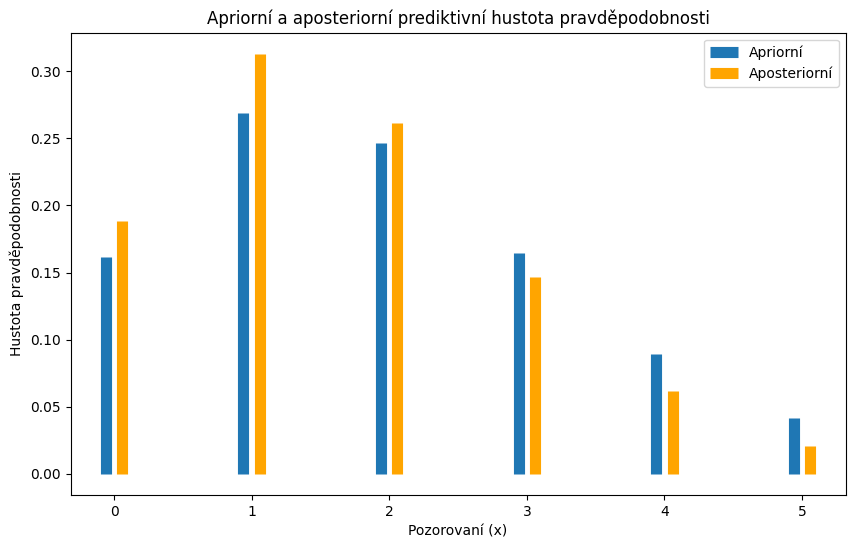

In [1457]:
# 2. Výpočet a vykreslení apriorního a aposteriorního prediktivního rozdělení
print("2. Podúkol:")
pred_prior = poisson.pmf(x, alpha/beta)
pred_post = poisson.pmf(x, alpha_post/beta_post)

x = np.arange(0, 6)
plt.figure(figsize=(10, 6))
plt.vlines(x-0.06, 0, nbinom.pmf(x, alpha, beta/(1 + beta)), label='Apriorní', linewidth=8)
plt.vlines(x+0.06, 0, nbinom.pmf(x, alpha_post, beta_post/(1 + beta_post)), label='Aposteriorní', color='orange', linewidth=8)

plt.title('Apriorní prediktivní rozdělení')
plt.xlabel('Pozorovaní (x)')
plt.ylabel('Hustota pravděpodobnosti')
plt.legend()

plt.title('Apriorní a aposteriorní prediktivní hustota pravděpodobnosti')
plt.xlabel('Pozorovaní (x)')
plt.ylabel('Hustota pravděpodobnosti')
plt.legend()

plt.show()


In [1458]:
# 3. 95% interval spolehlivosti
prior_interval = gamma.interval(0.95, alpha, scale=1/beta)
posterior_interval = gamma.interval(0.95, alpha_post.iloc[0], scale=1/beta_post)

print("3. Podúkol:")
print(f"Apriorní 95% interval spolehlivosti: {prior_interval}")
print(f"Aposteriorní 95% interval spolehlivosti: {posterior_interval}")
print("\n")
print("Aposteriorní interval je užší než apriorní interval, což naznačuje, že nová data vedou k větší jistotě v odhadu parametru λ.")
print("\n")

# 4. Dva aposteriorní bodové odhady parametru 𝜆
posterior_mean = alpha_post / beta_post
posterior_median = gamma.median(alpha_post, scale=1/beta_post)

print("4. Podúkol:")
print(f"Aposteriorní bodový odhad 𝜆 pro střední hodnoty: {posterior_mean.iloc[0]}")
print(f"Aposteriorní bodový odhad 𝜆 mediánu: {posterior_median[0]}")
print("\n")
print("Tyto hodnoty jsem vybral, protože pokud je obě známe, tak nám mohou dát jistý obrázek o rozložení dat, což dále komentuju.")
print("To, že jsou hodnoty mediánu a střední hodnoty velice podobné může naznačovat, že data mají symetrický tvar a nejsou výrazně zkreslená do jednoho nebo druhého směru.")

print("\n")

# 5. Jeden apriorní a jeden aposteriorní bodový odhad počtu pozorovaní
prior_mean = alpha / beta
posterior_mean = alpha_post.iloc[0]/beta_post

print("5. Podúkol:")
print(f"Apriorní bodový odhad střední hodnoty: {prior_mean}")
print(f"Posteriorní bodový odhad střední hodnoty: {posterior_mean}")
print("\n")
print("Aposteriorní bodový odhad střední hodnoty je nižší, což může být způsobeno významnějšími nebo četnějšími nižšími hodnotami v nových datech.")

3. Podúkol:
Apriorní 95% interval spolehlivosti: (0.9590777392264868, 3.416960690283833)
Aposteriorní 95% interval spolehlivosti: (1.4376938284869922, 1.9327207471868797)


Aposteriorní interval je užší než apriorní interval, což naznačuje, že nová data vedou k větší jistotě v odhadu parametru λ.


4. Podúkol:
Aposteriorní bodový odhad 𝜆 pro střední hodnoty: 1.6761904761904762
Aposteriorní bodový odhad 𝜆 mediánu: 1.6730169441241727


Tyto hodnoty jsem vybral, protože pokud je obě známe, tak nám mohou dát jistý obrázek o rozložení dat, což dále komentuju.
To, že jsou hodnoty mediánu a střední hodnoty velice podobné může naznačovat, že data mají symetrický tvar a nejsou výrazně zkreslená do jednoho nebo druhého směru.


5. Podúkol:
Apriorní bodový odhad střední hodnoty: 2.0
Posteriorní bodový odhad střední hodnoty: 1.6761904761904762


Aposteriorní bodový odhad střední hodnoty je nižší, což může být způsobeno významnějšími nebo četnějšími nižšími hodnotami v nových datech.


b) Aproximace diskrétním rozdělením [2 body]
Integrál ve jmenovateli Bayesově větě je ve většině praktických aplikací důvodem, proč
nejsme schopní odvodit aposteriorní hustotu analyticky. Jeden ze způsobů, jak překonat tento
problém a odhadnout parametru (ne vektor parametrů) je, že zvolíme diskrétní aproximaci a
neřešitelný integrál přejde na sumu.
Poznámka:
Nyní řešíme odhad aposteriorní hustoty a paramertů v případě, že apriorní informace (hustota)
je ve formě naměřených hodnot (sloupec „uloha_1 b)_prior“) a rozdělení procesu, který
sledujete, je také ve tvaru naměřených hodnot (sloupec „uloha_1 b)_pozorovania“). Tedy
místo zadání dvou hustot máme naměřené hodnoty a s pomocí tříděného statistického souboru
odhadneme hustoty. Pak se plocha pod hustotou spočítá součtem četností (obdoba
numerického počítání integrálu obdélníkovou metodou).
Víme, že délka zpracování procesu v milisekundách ms má odseknuté normální rozdělení
(truncated normal distribution)
viz.: https://en.wikipedia.org/wiki/Truncated_normal_distribution
s parametry
𝜇 = 3, 𝜎
2 = 1, 𝑎 = 1
Naší úlohou je odhadnout parametr 𝑏, t.j. maximální dobu trvání procesu. Máme historické
záznamy o jeho délce trvání (sloupec „uloha 1 a)_prior“) na počítačích podobné výkonové
řady. Provedli jsme sérii pozorovaní po 10, číslo série pozorovaní v tabulce v sloupci
„skupina“. Z těchto záznamů vyjádříte apriorní informaci o parametru 𝑏.
Ve sloupci „uloha_1 b)_pozorovania“ jsou naše pozorování délky trvání procesu Vyjádřete
funkci věrohodnosti (sloupec „uloha_1 b)_pozorovania“) (v tomto případe také jen její
diskrétní aproximace) a následně diskrétní aposteriorní hustotu.
Požadovaný výstup:
1) Do jednoho grafu vykreslíte apriorní, aposteriorní hustotou a funkci věrohodnosti.
Funkci věrohodnosti normujte tak, aby jej součet byl 1 kvůli porovnatelnosti
v obrázku.
2) Z aposteriorní hustoty určete 95% interval spolehlivosti (konfidenční interval) pro
parametr 𝑏.
3) Vyberte dva bodové odhady parametru 𝑏 a spočítejte je.

1. Podúkol:


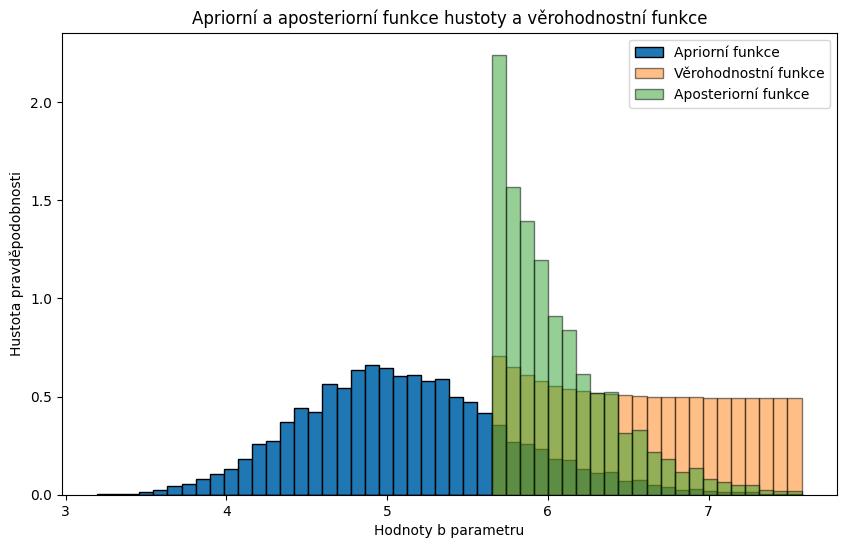

2. Podúkol:
95% intervalový odhad pre parametr b: (5.693712028182375, 7.008910628347767)


3. Podúkol:
Bodove odhad střední hodnoty  6.052771319832352
Bodove odhad mediánu:  5.956751748215453


In [1459]:
########### APRIORNI FUNKCE ###########

df_prior = pd.DataFrame(data, columns=["uloha_1 b)_prior", "skupina"])

grouped_data_prior = df_prior.groupby('skupina')['uloha_1 b)_prior'].apply(list).reset_index(name='grouped_lists')

# Funkce pro nalezení maximální hodnoty v listu
def find_max_in_list(lst):
    return max(lst)

# Nalezení maximální hodnoty v každé skupině
max_prior_values = grouped_data_prior['grouped_lists'].apply(find_max_in_list)

# Počet intervalů, na které se rozdělí data
num_intervals = 50

hist, bin_edges = np.histogram(max_prior_values, bins=num_intervals, density=True)

prior_values = hist
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, prior_values, width=(bin_edges[1] - bin_edges[0]), align='center',edgecolor='black',label="Apriorní funkce")




########### VEROHODNOSTNI FUNKCE ###########
df_observ = pd.DataFrame(data, columns=["uloha_1 b)_pozorování"])[:100]
mu=3
sigma = 1
a=1
a_normalized = (a - mu) / sigma

likelihood_values = [truncnorm.pdf(df_observ, a=a_normalized,b=(b - mu) / sigma,loc=mu,scale=sigma) for b in bin_centers]
likelihood_values = [np.prod(x) for x in  likelihood_values]
normalization_factor = np.trapz(likelihood_values, bin_centers)
likelihood_values = likelihood_values / normalization_factor

plt.bar(bin_centers, likelihood_values, width=(bin_edges[1] - bin_edges[0]), align='center',edgecolor='black', alpha=0.5, label="Věrohodnostní funkce")

    


########### APOSTERIORNI FUNKCE ###########    

# Výpočet normalizačního faktoru
normalization_factor = np.trapz([likelihood_values[x]*prior_values[x] for x in range(len(likelihood_values))], bin_centers)

# Výpočet aposteriorní funkce
aposterior_values = [(likelihood_values[x]*prior_values[x]/normalization_factor) for x in range(len(likelihood_values))]

plt.bar(bin_centers, aposterior_values, width=(bin_edges[1] - bin_edges[0]), align='center',edgecolor='black', alpha=0.5, label="Aposteriorní funkce")


 
print("1. Podúkol:")
plt.xlabel('Hodnoty b parametru')
plt.ylabel('Hustota pravděpodobnosti')
plt.title('Apriorní a aposteriorní funkce hustoty a věrohodnostní funkce')
plt.legend()
plt.show()



# Kumulativní distribuční funkce (CDF)
cdf = np.cumsum(aposterior_values) / np.sum(aposterior_values)
# Určení hranice intervalu pomocí CDF
lower_bound = bin_centers[np.argmax(cdf >= 0.025)]
upper_bound = bin_centers[np.argmax(cdf >= 0.975)]

print("2. Podúkol:")
print("95% intervalový odhad pre parametr b: ({}, {:})".format(lower_bound, upper_bound))



mean_val = np.sum(bin_centers * aposterior_values)/np.sum(aposterior_values)
median_val = bin_centers[np.argmax(cdf >= 0.5)]

print("\n")
print("3. Podúkol:")
print("Bodove odhad střední hodnoty ", mean_val)
print("Bodove odhad mediánu: ", median_val)


### ÚLOHA 2 – Regrese – 8. bodů
Úkoly a požadované výstupy:
1) Pomocí zpětné eliminace určete vhodný regresní model. Za výchozí „plný“ model
považujte plný kvadratický model (všechny interakce druhého řádu a všechny druhé
mocniny, které dávají smysl).
    Zapište rovnici Vašeho finálního modelu.
    Diskutujte splnění předpokladů lineární regrese a základní regresní diagnostiky.
    Pokud (až během regresního modelování) identifikujete některé „extrémně odlehlé hodnoty“ můžete ty „nejodlehlejší“ hodnoty, po alespoň krátkém zdůvodnění, vyřadit. [4. body]
2) Pomocí Vašeho výsledného modelu identifikujte, pro které nastavení parametrů má odezva nejproblematičtější hodnotu. [1. bod]
3) Odhadněte hodnotu odezvy uživatele s Windows, při průměrném nastavení ostatních parametrů a vypočtěte konfidenční interval a predikční interval pro toto nastavení. [1. bod]
4) Na základě jakýchkoli vypočtených charakteristik argumentujte, zdali je Váš model „vhodný“ pro další použití. [2. body]

In [1460]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_excel(r"Projekt-2_Data.xlsx", sheet_name="Úloha 2")


# Odhaleni zavislosti InteractingPct a ScrollingPct pomoci korelacni matice ####
X = df.iloc[:, 1:]

correlation_matrix = X.corr()
print("Podúkol 1 (začátek):")
print(correlation_matrix)


Podúkol 1 (začátek):
                ActiveUsers  InteractingPct  ScrollingPct  Ping [ms]
ActiveUsers        1.000000        0.040275     -0.040275   0.693499
InteractingPct     0.040275        1.000000     -1.000000   0.406957
ScrollingPct      -0.040275       -1.000000      1.000000  -0.406957
Ping [ms]          0.693499        0.406957     -0.406957   1.000000


V korelační matici byla nalezena závislost mezi InteractingPct a ScrollingPct a tedy musím jednu z těchto hodnot odstranit.

In [1461]:

# Odstraneni zavislosti (ScrollingPct)

X = df.loc[:,df.columns != 'ScrollingPct']



#### Prevedeni kategorialnich dat do jednotlivych sloupcu ####

mat=pd.get_dummies(df,drop_first=True)
mat=mat.astype(float)

X = sm.add_constant(mat[['ActiveUsers', 'InteractingPct','OSType_MacOS', 'OSType_Windows','OSType_iOS']])


In [1462]:


#### VYTVORENI UPLNEHO KVADRATICKEHO MODELU ####
X['ActiveUsers*ActiveUsers'] = X['ActiveUsers'] *  X['ActiveUsers']
X['InteractingPct*InteractingPct'] = X['InteractingPct'] * X['InteractingPct'] 
X['ActiveUsers*InteractingPct'] = X['ActiveUsers'] * X['InteractingPct']

X['ActiveUsers*OSType_MacOS'] = X['ActiveUsers'] * X['OSType_MacOS']
X['ActiveUsers*OSType_Windows'] = X['ActiveUsers'] * X['OSType_Windows']
X['ActiveUsers*OSType_iOS'] = X['ActiveUsers'] * X['OSType_iOS']

X['InteractingPct*OSType_MacOS'] = X['InteractingPct'] * X['OSType_MacOS']
X['InteractingPct*OSType_Windows'] = X['InteractingPct'] * X['OSType_Windows']
X['InteractingPct*OSType_iOS'] = X['InteractingPct'] * X['OSType_iOS']


y = df['Ping [ms]'].astype(int)

orig_X = X.copy() 


# Normalizace hodnot
X.iloc[:,1:] = (X.iloc[:,1:] - X.iloc[:,1:].min()) / (X.iloc[:,1:].max() - X.iloc[:,1:].min())



In [1463]:
model = sm.OLS(y, X).fit()

# Metoda zpětné eliminace
for col, pval in zip(X.columns, model.pvalues):
    if(col == 'const'):
        continue
    else:
        if pval > 0.05:
            X = X.drop(col, axis=1)
    
    model = sm.OLS(y, X).fit()



In [1464]:
#### VIF (Multikolinearita) ####

vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()

# Nastavení názvu sloupce
vif_df.columns = ['VIF']

print(vif_df)
print("\n")
# Odstranění hodnoty > 10 
X = X.drop('ActiveUsers*ActiveUsers', axis=1)
vif = pd.Series([variance_inflation_factor(X.values, i) 
                 for i in range(X.shape[1])], 
                 index=X.columns)
vif_df = vif.to_frame()
vif_df.columns = ['VIF']

print("Hodnoty VIF po odstraneni hodnoty ActiveUsers*ActiveUsers:")
print(vif_df)



                                  VIF
const                       32.761712
ActiveUsers                 24.981312
InteractingPct               5.576012
OSType_Windows               5.551936
ActiveUsers*ActiveUsers     22.204978
ActiveUsers*InteractingPct   8.566008
ActiveUsers*OSType_MacOS     1.657555
ActiveUsers*OSType_Windows   6.474746
ActiveUsers*OSType_iOS       1.550683


Hodnoty VIF po odstraneni hodnoty ActiveUsers*ActiveUsers:
                                  VIF
const                       21.405088
ActiveUsers                  4.567019
InteractingPct               5.561726
OSType_Windows               5.546736
ActiveUsers*InteractingPct   8.550677
ActiveUsers*OSType_MacOS     1.656643
ActiveUsers*OSType_Windows   6.464752
ActiveUsers*OSType_iOS       1.550671


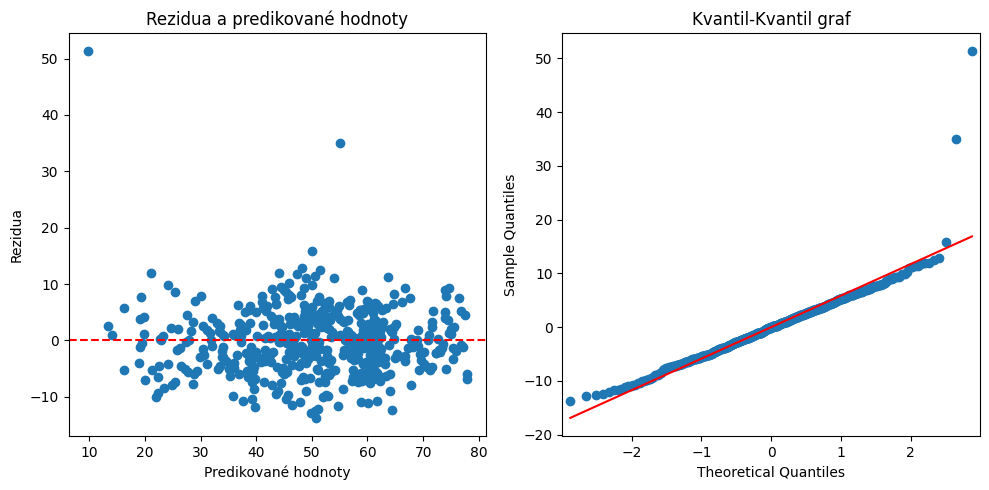

In [1465]:

results = model
residuals = results.resid

def plot_residuals(results):        
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Rezidua a predikované hodnoty
    axs[0].scatter(results.fittedvalues, results.resid)
    axs[0].set_xlabel('Predikované hodnoty')    
    axs[0].set_title('Rezidua a predikované hodnoty')
    axs[0].set_ylabel('Rezidua')
    axs[0].axhline(y=0, color='red', linestyle='--')

    # Porovnání kvantilů pozorovaných dat s kvantily teoretického normálního rozdělení
    sm.qqplot(results.resid, line='s', ax=axs[1])
    axs[1].set_title('Kvantil-Kvantil graf')

    plt.tight_layout()
    plt.show()
    
plot_residuals(results)


Z grafů jsou patrné dvě odlehlé hodnoty, které tedy vymažu, jelikož by příliš (negativně) ovlivnily výsledný model.


In [1466]:
# Denormalizace (navrácení původních hodnot)
data_denorm = orig_X
results = model

# Výpis odlehlých hodnot (viz democvičení)
influence = results.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance
standardized_residuals = influence.resid_studentized_internal
studentized_residuals = influence.resid_studentized_external

outl_stats_df = pd.DataFrame({
    'Leverage': influence.hat_matrix_diag,
    'Standardized Residuals': influence.resid_studentized_internal,
    'Studentized Residuals': influence.resid_studentized_external,
    'Cook\'s Distance': influence.cooks_distance[0],
    'Cook\'s Distance_p-value': influence.cooks_distance[1]
}, index=data_denorm.index)[
    (influence.hat_matrix_diag > 3 * len(results.params) / data_denorm.shape[0]) |
    (np.abs(influence.resid_studentized_internal) > 2) |
    (influence.cooks_distance[1] < 0.05)
]

print(outl_stats_df)

# Odstranění dvou odlehlých hodnot
y.drop(index=[255,476], inplace=True)
X.drop(index=[255,476], inplace=True)


     Leverage  Standardized Residuals  Studentized Residuals  Cook's Distance  \
82   0.010629                2.701890               2.719357         0.008714   
114  0.009264                2.175567               2.183868         0.004917   
129  0.014180               -2.139925              -2.147752         0.007319   
145  0.012741               -2.338264              -2.348953         0.007840   
178  0.046841                2.067581               2.074497         0.023342   
255  0.009955                5.951319               6.171083         0.039571   
298  0.055246               -0.398586              -0.398246         0.001032   
310  0.016638               -2.112085              -2.119553         0.008386   
332  0.012273                2.038529               2.045098         0.005737   
428  0.019751                2.142646               2.150508         0.010278   
430  0.016629               -2.061131              -2.067969         0.007982   
476  0.047314               

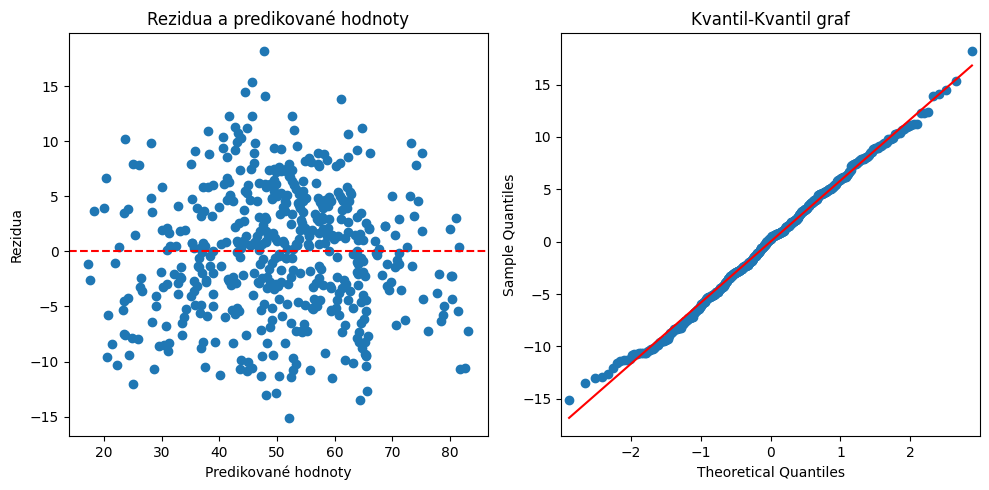

In [1467]:
model = sm.OLS(y, X).fit()

# Zobrazení upravených reziduí
plot_residuals(model)


**Splnění předpokladů lineární regrese**

Graf reziduí a predikovaných naznačuje homoskedasticitu, což znamená, že rozptyl reziduí je konzistentní napříč celým rozsahem predikovaných hodnot.

Z kvantil-kvantil grafu lze vidět, že pozorovaná data jsou v souladu s kvantily normálního rozdělení. Pokud jsou body od přímky výrazně odchýleny, může to naznačovat odchylku od normálního rozdělení, což se v tomto případě neděje.

Dalé lze z VIF pozorovat absence multicolinearity, což je dalším předpokladem lineární regrese.

A také lze z výpisu modelu vyčíst, že data jsou nezávislá (Durbin-Watson statistika).
Viz závěrečné zhodnocení.


In [1468]:
print("Výsledný model:")
print(model.summary())

Výsledný model:
                            OLS Regression Results                            
Dep. Variable:              Ping [ms]   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     374.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.71e-192
Time:                        22:50:54   Log-Likelihood:                -1592.3
No. Observations:                 500   AIC:                             3201.
Df Residuals:                     492   BIC:                             3234.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cons

In [1469]:
pings = model.predict()
max_ping_index = model.predict().argmax()

# Zjištění nejvyšší odezvy z predikce
print("Podúkol 2:")
print("Maximální hodnota odezvy:", pings[max_ping_index])
# Výpis parametrů s nejvyšší odezvou
print("\n")
print("Problémové nastavení nastavení parametrů:")
print(mat.iloc[max_ping_index])


Podúkol 2:
Maximální hodnota odezvy: 83.18945858068771


Problémové nastavení nastavení parametrů:
ActiveUsers       9953.0000
InteractingPct       0.6729
ScrollingPct         0.3271
Ping [ms]           76.0000
OSType_MacOS         1.0000
OSType_Windows       0.0000
OSType_iOS           0.0000
Name: 227, dtype: float64


In [1470]:

avg_windows = X[X['OSType_Windows'] == 1].mean()
prediction = model.get_prediction(avg_windows)
prediction_value = prediction.summary_frame(alpha=0.05)
ping = prediction_value["mean"].iloc[0]
lower_bound_conf = prediction_value["mean_ci_lower"].iloc[0]
upper_bound_conf = prediction_value["mean_ci_lower"].iloc[0]

lower_bound_pred = prediction_value["obs_ci_lower"].iloc[0]
upper_bound_pred = prediction_value["obs_ci_upper"].iloc[0]

print("Podúkol 3:")
print("Odezva uživatele s Windows při průměrném nastavení parametrů: ", ping)
print("Konfidenční interval: ({}, {:})".format(lower_bound_conf, upper_bound_conf))
print("Predikční interval: ({}, {:})".format(lower_bound_pred, upper_bound_pred))


Podúkol 3:
Odezva uživatele s Windows při průměrném nastavení parametrů:  51.42857142857149
Konfidenční interval: (50.424653111678104, 50.424653111678104)
Predikční interval: (39.8073767284901, 63.04976612865288)


Podúkol 4:  

Použitelnost, správnost mého modelu indikuje spousta ukazatelů, které můžeme vyčíst ze shrnutí modelu:  

    -Durbin-Watson statistika (1.914), která se blíží hodnotě 2, což značí, že hodnoty reziduí nejsou na sobě nijak závislé.  
    -Cond. No. (22.4) je nizké tedy matice plánu je dobře podmíněná a malá změna ve vstupech způsobů malou (úměrnou) změnu v koeficientech.  
    -Prob(JB) (0.186) je vyšší než hladina významnosti (0.05) a tedy nezamítáme nulovou hypotézu o normálním rozdělení reziduí.  
    -R-squared(0.842) míra variability, která se blíží hodnotě 1, indikuje, že model dobře vysvětluje variabilitu závislé proměnné na základě vstupních dat.